In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [4]:
df = pd.read_csv('edju.csv')
df.head(5)

,Unnamed: 0,kids,age,education,siblings,ethnicity,city16,lowincome16,immigrant
0,1,0,25,14,1,cauc,no,no,no
1,2,1,30,13,4,cauc,yes,no,no
2,3,1,55,2,1,cauc,no,no,yes
3,4,2,57,16,1,cauc,no,no,no
4,5,2,71,12,6,cauc,yes,no,no


In [5]:
dfc = df
dfc[["city16"]] = df[["city16"]].eq('yes').mul(1)
dfc[["lowincome16"]] = df[["lowincome16"]].eq('yes').mul(1)
dfc[["immigrant"]] = df[["immigrant"]].eq('yes').mul(1)
dfc[["ethnicity"]] = df[["ethnicity"]].eq('cauc').mul(1)
dfc.head(5)

,Unnamed: 0,kids,age,education,siblings,ethnicity,city16,lowincome16,immigrant
0,1,0,25,14,1,1,0,0,0
1,2,1,30,13,4,1,1,0,0
2,3,1,55,2,1,1,0,0,1
3,4,2,57,16,1,1,0,0,0
4,5,2,71,12,6,1,1,0,0


In [6]:
dfc['education'].value_counts()

12    3093
16     990
14     931
13     814
11     558
8      446
10     442
15     399
9      305
18     290
17     259
20     125
7      119
6      108
19      86
5       58
4       42
3       26
2       13
0       12
1        4
Name: education, dtype: int64

array([[<Axes: title={'center': 'age'}>]], dtype=object)

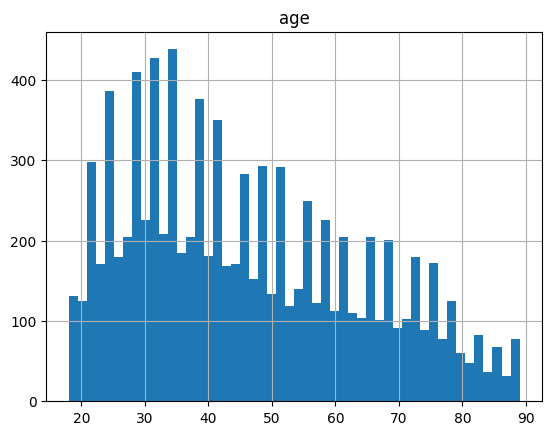

In [7]:
dfc.hist(column='age', bins=50)

In [8]:
dfc.columns

Index(['Unnamed: 0', 'kids', 'age', 'education', 'siblings', 'ethnicity',
       'city16', 'lowincome16', 'immigrant'],
      dtype='object')

In [9]:
X = dfc[['kids', 'age','siblings', 'ethnicity', 'city16', 'lowincome16', 'immigrant']] .values  #.astype(float)
X[0:5]

array([[ 0, 25,  1,  1,  0,  0,  0],
       [ 1, 30,  4,  1,  1,  0,  0],
       [ 1, 55,  1,  1,  0,  0,  1],
       [ 2, 57,  1,  1,  0,  0,  0],
       [ 2, 71,  6,  1,  1,  0,  0]], dtype=int64)

In [10]:
y = dfc['education'].values
y[0:5]

array([14, 13,  2, 16, 12], dtype=int64)

In [11]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.15019194, -1.17626113, -0.93983255,  0.49330901, -0.85934126,
        -0.51946248, -0.35053693],
       [-0.59617533, -0.89728851, -0.01560645,  0.49330901,  1.16368205,
        -0.51946248, -0.35053693],
       [-0.59617533,  0.49757459, -0.93983255,  0.49330901, -0.85934126,
        -0.51946248,  2.85276647],
       [-0.04215872,  0.60916363, -0.93983255,  0.49330901, -0.85934126,
        -0.51946248, -0.35053693],
       [-0.04215872,  1.39028697,  0.60054429,  0.49330901,  1.16368205,
        -0.51946248, -0.35053693]])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7296, 7) (7296,)
Test set: (1824, 7) (1824,)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [14]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([10,  0, 10, 12, 16], dtype=int64)

In [15]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.4628563596491228
Test set Accuracy:  0.24835526315789475


In [16]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.18859649, 0.21820175, 0.22861842, 0.24835526, 0.2691886 ,
       0.27905702, 0.28344298, 0.29769737, 0.3064693 , 0.31195175,
       0.31633772, 0.31633772, 0.32017544, 0.32510965, 0.3316886 ,
       0.33114035, 0.33607456, 0.33607456, 0.33662281])

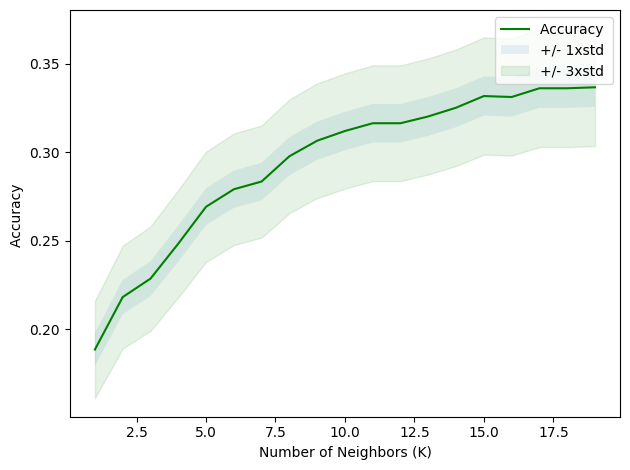

In [17]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [18]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.3366228070175439 with k= 19
